### Problem: https://youtu.be/g9n0a0644B4

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#NEIGHBOR_DELTAS = [(-1, -1), (0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0)]
NEIGHBOR_DELTAS = [(-1, -1), (0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (0, 0)]

def draw_shape(shape : np.array):
    fig, ax = plt.subplots(figsize=(1, 1))
    
    xsize = shape.shape[1]
    ysize = shape.shape[0]

    ax.set_aspect('equal')
    ax.set_xlim(0, xsize)
    ax.set_ylim(0, ysize)
    ax.invert_yaxis()

    for y in range(ysize):
        for x in range(xsize):
            if shape[y, x] != 0:
                ax.add_patch(plt.Rectangle((x, y), 1, 1, color='green'))

    ax.grid(True, linestyle='-', linewidth=0.5)
    ax.set_xticks(range(xsize))
    ax.set_yticks(range(ysize))
    
    plt.show()
    
def lbp(shape : np.array):
    shape = np.pad(shape, 2)

    xsize = shape.shape[1]
    ysize = shape.shape[0]
    
    result = np.zeros((ysize, xsize), dtype=int)
    
    def calculate_cell_value(x, y) -> int:
        cell_value = 0
        for dx, dy in NEIGHBOR_DELTAS:
            #bit_value = (shape[y + dy, x + dx] >= shape[y, x])
            bit_value = shape[y + dy, x + dx]
            cell_value = (cell_value | bit_value) << 1
        return cell_value >> 1 # undo the last, extra shift

    for y in range(1, ysize - 1):
        for x in range(1, xsize - 1):
            #print( x, y, shape[y, x] )
            result[y - 1, x - 1] = calculate_cell_value(x, y)
    return result

---

In [3]:
base_shape1 = np.array([
    [1, 1, 1, 0],
    [0, 0, 1, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 0],
], dtype=int)

base_shape2 = np.array([
    [1, 1, 1, 1]
], dtype=int)

base_shape3 = np.array([
    [1, 1, 1, 1],
    [1, 0, 0, 0],
], dtype=int)

base_shape4 = np.array([
    [1, 1, 1, 1],
    [1, 1, 1, 0],
], dtype=int)

base_shape5 = np.array([
    [1, 1, 1, 1],
    [1, 0, 0, 1],
    [1, 1, 1, 1],
    [1, 1, 1, 1],
    [1, 0, 0, 1],
    [1, 1, 1, 1],
], dtype=int)

base_shape6 = np.array([
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 1, 1, 1],
], dtype=int)

base_shape7 = np.array([
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 1, 1, 1],
], dtype=int)

base_shape8 = np.array([
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [1, 1, 1, 1],
], dtype=int)

# List of tuples: (number of rotations, the base shape)
base_shapes = [
    (4, base_shape1),
    (2, base_shape2),
    (4, base_shape3),
    (4, base_shape4),
    (4, base_shape5),
    (4, base_shape6),
    (4, base_shape7),
    (4, base_shape8),
]
all_shapes = []

# rotate each base shape to make rotated variants of the same shape
for rotations, base_shape in base_shapes:
    variants = []
    for k in range(0, rotations):
        variants.append(np.rot90(base_shape, k))
    all_shapes.append(variants)

Next shape:


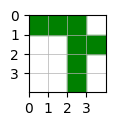

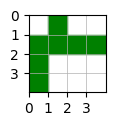

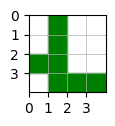

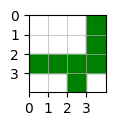

Next shape:


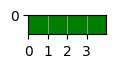

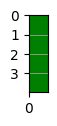

Next shape:


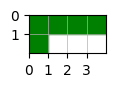

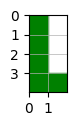

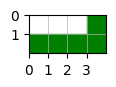

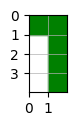

Next shape:


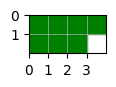

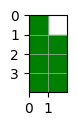

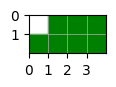

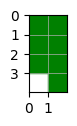

Next shape:


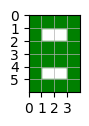

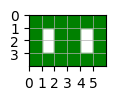

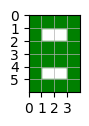

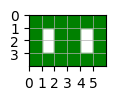

Next shape:


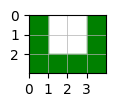

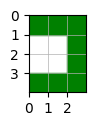

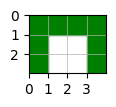

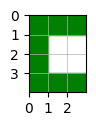

Next shape:


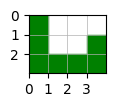

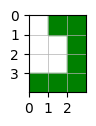

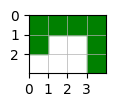

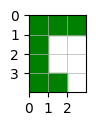

Next shape:


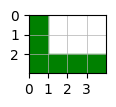

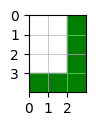

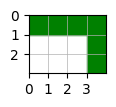

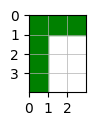

In [4]:
for shape in all_shapes:
    print("Next shape:")
    for variant in shape:
        draw_shape(variant)

--------------------
Next shape:
--------------------
3577:


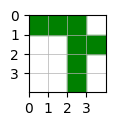

--------------------
3577:


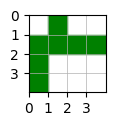

--------------------
3577:


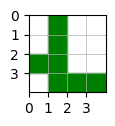

--------------------
3577:


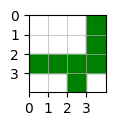

Sums of all variants: [3577, 3577, 3577, 3577]
--------------------
Next shape:
--------------------
2044:


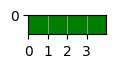

--------------------
2044:


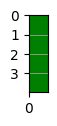

Sums of all variants: [2044, 2044]
--------------------
Next shape:
--------------------
2555:


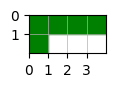

--------------------
2555:


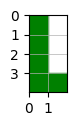

--------------------
2555:


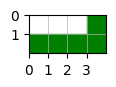

--------------------
2555:


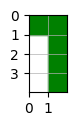

Sums of all variants: [2555, 2555, 2555, 2555]
--------------------
Next shape:
--------------------
3577:


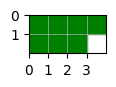

--------------------
3577:


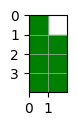

--------------------
3577:


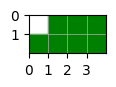

--------------------
3577:


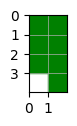

Sums of all variants: [3577, 3577, 3577, 3577]
--------------------
Next shape:
--------------------
10220:


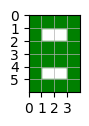

--------------------
10220:


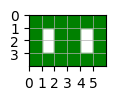

--------------------
10220:


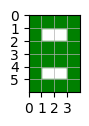

--------------------
10220:


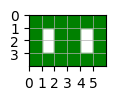

Sums of all variants: [10220, 10220, 10220, 10220]
--------------------
Next shape:
--------------------
4088:


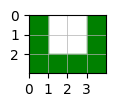

--------------------
4088:


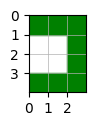

--------------------
4088:


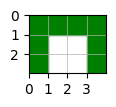

--------------------
4088:


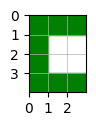

Sums of all variants: [4088, 4088, 4088, 4088]
--------------------
Next shape:
--------------------
3577:


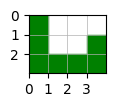

--------------------
3577:


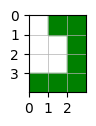

--------------------
3577:


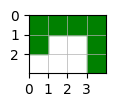

--------------------
3577:


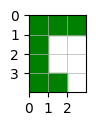

Sums of all variants: [3577, 3577, 3577, 3577]
--------------------
Next shape:
--------------------
3066:


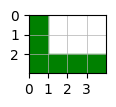

--------------------
3066:


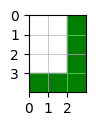

--------------------
3066:


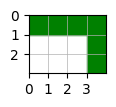

--------------------
3066:


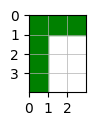

Sums of all variants: [3066, 3066, 3066, 3066]


In [5]:
for shape in all_shapes:
    sums = []
    print("-" * 20)
    print("Next shape:")
    for variant in shape:
        lbp_mat = lbp(variant)
        print("-" * 20)
        sums.append(np.sum(lbp_mat))
        print(f"{sums[-1]}:")
        draw_shape(variant)
    print(f"Sums of all variants: {sums}")